# Introdução
Este projeto tem como objetivo descobrir se há alguma relação entre o preço de um produto e sua avaliação. Além da avaliação serão usadas algumas features para tentar encontrar esta relação. Fizemos 4 tentativas

# 1. Lendo bibliotecas

In [1]:
import numpy as np
import pandas as pd
import os
import math
# Regressão Linear
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeRegressor


import seaborn as sns
%matplotlib inline

# Plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

# 2. Ler o DataSet

In [2]:
filename = 'dataset.xlsx'
if not filename in os.listdir():
    print(f'Não encontrei o arquivo {filename}')

In [3]:
dados = pd.read_excel(filename)
print(f"Temos as colunas {dados.columns}")

Temos as colunas Index(['price (£)', 'number_of_reviews', 'rating', 'category'], dtype='object')


# 3. Tratamento da coluna 'Category'
A coluna category na prática é uma hierarquia de categorias que podem se misturar. Ex. A subcategoria celulares pode estar tanto dentro de comunicação quanto de tecnologia. Nesta etapa vamos separar a categoria em categoria, subcategoria e subsubcategoria.

In [4]:
# dados['parentcategory', 'subcategory', 'subsubcategory'] = dados['category'].str.split(' > ')
dados['parentcategory'] = dados['category'].map(lambda category: category.split(' > ')[0])
dados['subcategory'] = dados['category'].map(lambda category: category.split(' > ')[1])
dados['subsubcategory'] = dados['category'].map(lambda category: category.split(' > ')[2] if 2 < len(category.split(' > ')) else "Outros")

dados.head()

,price (£),number_of_reviews,rating,category,parentcategory,subcategory,subsubcategory
0,3.42,15,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles
1,16.99,2,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles
2,9.99,17,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles
3,39.99,1,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles
4,32.19,3,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Model Trains & Railway Sets,Rail Vehicles


**Em seguida fizemos um value count para ver as quantidades em cada categoria**

## Value counts

In [5]:
dados['parentcategory'].value_counts()

Hobbies                             1198
Die-Cast & Toy Vehicles             1072
Figures & Playsets                   890
Games                                795
Characters & Brands                  747
Arts & Crafts                        741
Party Supplies                       672
Fancy Dress                          526
Dolls & Accessories                  337
Sports Toys & Outdoor                335
Puppets & Puppet Theatres            246
Jigsaws & Puzzles                    230
Baby & Toddler Toys                   77
Pretend Play                          39
Musical Toy Instruments               15
Novelty & Special Use                 10
Pens, Pencils & Writing Supplies       7
Office Supplies                        6
Home Accessories                       5
Bags                                   4
Cooking & Dining                       4
Worlds Apart                           3
Electronic Toys                        3
Educational Toys                       3
Gardening       

In [6]:
dados['subcategory'].value_counts()

Toy Vehicles & Accessories     966
Accessories                    530
Children's Craft Kits          390
Science Fiction & Fantasy      359
Model Trains & Railway Sets    328
                              ... 
Marvin's Magic                   1
Winnie-the-Pooh                  1
Drawing & Painting Supplies      1
Pencils                          1
Drinking Games                   1
Name: subcategory, Length: 138, dtype: int64

In [7]:
dados['subsubcategory'].value_counts()


Outros                         3275
Scaled Models                   866
Toys                            504
Bead Art & Jewellery-Making     340
Balloons                        284
                               ... 
Thread                            1
Poker Chip Cases & Trays          1
Books                             1
Paints                            1
Fashion Dolls                     1
Name: subsubcategory, Length: 104, dtype: int64

**Problema**: Temos muitas categorias com poucos dados. Para isso vamos trocá-las por "outros"

In [8]:
dados['new_parentcategory'] = dados['parentcategory'].map(lambda category: category if dados['parentcategory'].value_counts()[category] >= 300 else 'Outros')
dados['new_subcategory'] = dados['subcategory'].map(lambda category: category if dados['subcategory'].value_counts()[category] >= 300 else 'Outros')
dados['new_subsubcategory'] = dados['subsubcategory'].map(lambda category:  category if dados['subsubcategory'].value_counts()[category] >= 300 else 'Outros')

## Value Counts com Categorias irrelevantes substituidas por "Outros"

In [9]:
dados['new_parentcategory'].value_counts()

Hobbies                    1198
Die-Cast & Toy Vehicles    1072
Figures & Playsets          890
Games                       795
Characters & Brands         747
Arts & Crafts               741
Outros                      673
Party Supplies              672
Fancy Dress                 526
Dolls & Accessories         337
Sports Toys & Outdoor       335
Name: new_parentcategory, dtype: int64

In [10]:
dados['new_subcategory'].value_counts()

Outros                          4779
Toy Vehicles & Accessories       966
Accessories                      530
Children's Craft Kits            390
Science Fiction & Fantasy        359
Model Trains & Railway Sets      328
Banners, Stickers & Confetti     328
Decorations                      306
Name: new_subcategory, dtype: int64

In [11]:
dados['new_subsubcategory'].value_counts()

Outros                         6276
Scaled Models                   866
Toys                            504
Bead Art & Jewellery-Making     340
Name: new_subsubcategory, dtype: int64

# 4. Análise Exploratória
O primeiro passo após ter o DataSet carregado é olhar os dados e tentar descobrir possíveis correlações. Para isso vamos plotar alguns gráficos:

## Produtos sem considerar categorias

## Produtos por categorias

**Primeiramente buscamos utilizar os dados da funcao Describe para assim plotar os graficos!**

**Gráficos:** Esses gráficos representam nossa análise exploratória, abaixo refizemos os gráficos que consideramos os mais importantes

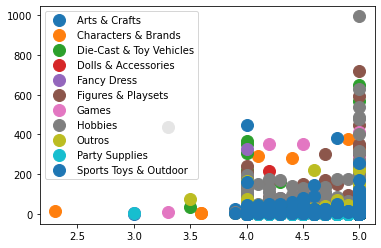

In [34]:
groups = dados.groupby('new_parentcategory')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.rating, group["price (£)"], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

# Fonte: https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category


### Hipótese
Para a análise dos produtos, nós vamos usar seis principais características: preço, avaliação, número de avaliações, categoria, subcategoria e subsubcategoria; sendo review o target e as demais variáveis features.

A partir dos gráficos acima formulamos a seguinte hipótese: **Quanto maior a avaliação, maior o preço e quanto maior número de reviews, menor o preço do produto**.
Lógica por trás da decisão:
1. Pessoas vão entrar para reclamar se o produto for ruim, mas não necessariamente vão elogiá-lo se for bom;
2. Produtos com boas avaliações tendem a ter melhor qualidade, o que reflete em seu preço

**Primeiramente buscamos utilizar os dados da funcao Describe para assim plotar os graficos!**

In [12]:
print(dados.describe(include = 'all'))

          price (£)  number_of_reviews       rating  \
count   7986.000000        7986.000000  7986.000000   
unique          NaN                NaN          NaN   
top             NaN                NaN          NaN   
freq            NaN                NaN          NaN   
mean      19.848063           9.371776     4.709154   
std       39.049344          36.484311     0.372529   
min        0.010000           1.000000     2.300000   
25%        4.630000           1.000000     4.500000   
50%       10.000000           2.000000     5.000000   
75%       19.990000           6.000000     5.000000   
max      995.110000        1399.000000     5.000000   

                                                 category parentcategory  \
count                                                7986           7986   
unique                                                235             40   
top     Die-Cast & Toy Vehicles > Toy Vehicles & Acces...        Hobbies   
freq                               

TODOS GRAFICOS POSSIVEIS


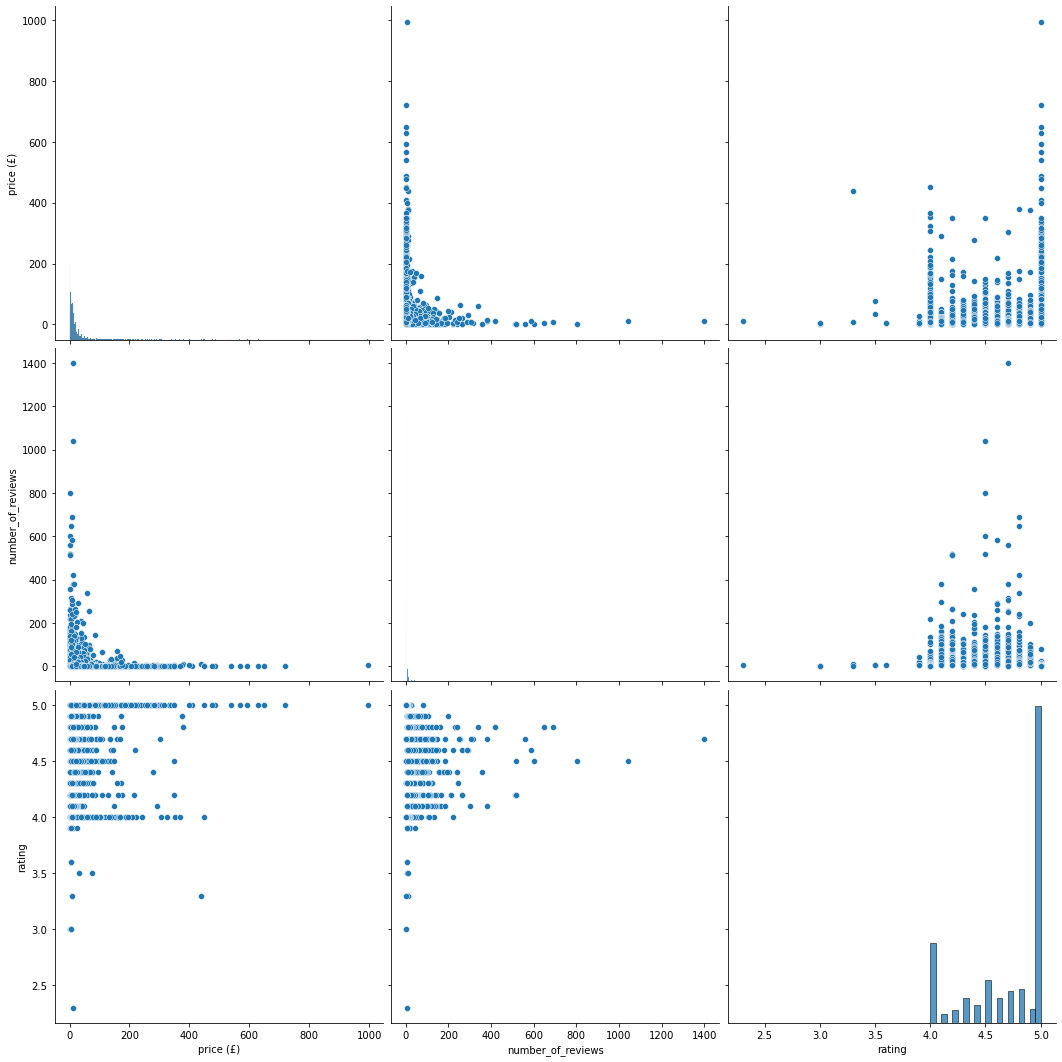

In [13]:
# Todos os gráficos possíveis
print("TODOS GRAFICOS POSSIVEIS")
sns.pairplot(dados,height = 5)


**Gráficos:** Esses gráficos representam nossa análise exploratória, abaixo refizemos os gráficos que consideramos os mais importantes

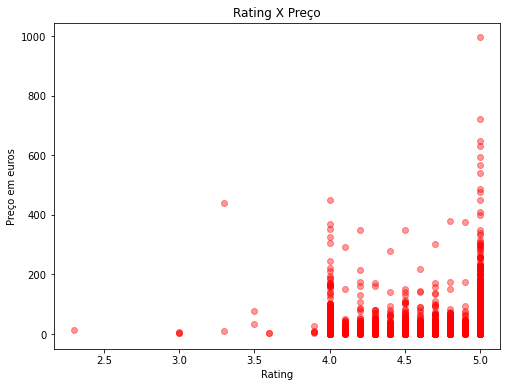

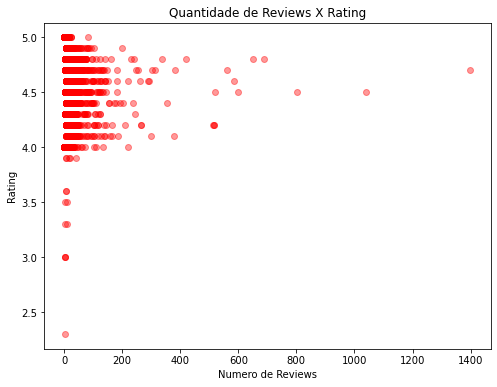

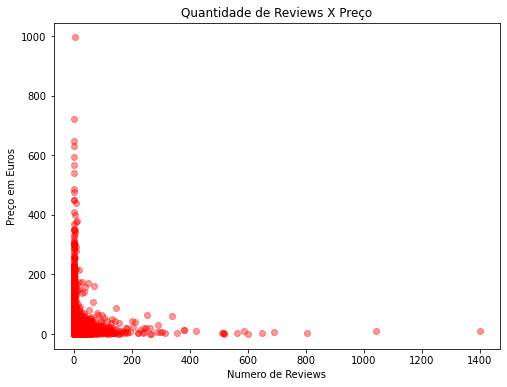

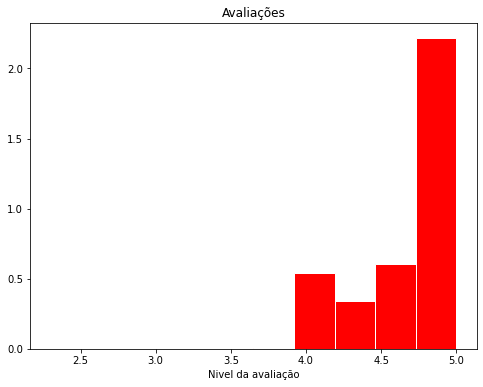

In [14]:

plt.figure(figsize = (8,6))
plt.scatter(dados.rating,dados["price (£)"], c='red', alpha=0.4)
plt.title('Rating X Preço')
plt.xlabel('Rating')
plt.ylabel('Preço em euros')
plt.show()

plt.figure(figsize = (8,6))
plt.scatter(dados.number_of_reviews, dados.rating, c='red', alpha=0.4)
plt.title('Quantidade de Reviews X Rating')
plt.xlabel('Numero de Reviews')
plt.ylabel('Rating')

plt.show()

plt.figure(figsize = (8,6))
plt.scatter(dados.number_of_reviews, dados["price (£)"], c='red', alpha=0.4)
plt.title('Quantidade de Reviews X Preço')
plt.xlabel('Numero de Reviews')
plt.ylabel('Preço em Euros')

plt.figure(figsize = (8,6))
plt.hist(dados.rating, edgecolor = 'white', density = True, color = "red")
plt.title('Avaliações')
plt.xlabel('Nivel da avaliação')

plt.show()




### Hipótese
Para a análise dos produtos, nós vamos usar três principais características: preço, avaliação e número de avaliações; sendo review o target e as demais variáveis features.

A partir dos gráficos acima formulamos a seguinte hipótese: **Quanto maior a avaliação, maior o preço e quanto maior número de reviews, menor o preço do produto**.
Lógica por trás da decisão:
1. Pessoas vão entrar para reclamar se o produto for ruim, mas não necessariamente vão elogiá-lo se for bom;
2. Produtos com boas avaliações tendem a ter melhor qualidade, o que reflete em seu preço

# Tentativa #1: Regressão Linear com 2 Features
Neste passo vamos fazer uma regressão linear multivariada utilizando MMQ, levando em consideração a o preço em função da avaliação e número de reviews. Iremos utilizar a bibilioteca 'statsmodels' para tentar obter a previsao de nossos dados!
Nessa tentativa nós usamos apenas as features ratings e numero de reviews.

In [15]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [16]:
# Target é o preço
y = dados[['price (£)']]

# Vamos usar o preço e número de reviews como features
x = dados[['number_of_reviews', 'rating']]

# Agora vamos fazer MMQ (OLS) com a função regress
resultados = regress(y, x)
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price (£)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.974
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           4.72e-05
Time:                        16:50:46   Log-Likelihood:                -40588.
No. Observations:                7986   AIC:                         8.118e+04
Df Residuals:                    7983   BIC:                         8.120e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6675      5.583      0.120      0.905     -10.277      11.612
number_of_reviews    -0.0285      0.012     -2.365      0.018      -0.052      -0.005
rating                4.1297      1.179      3.503      0.000       1.819       6.441
==============================================================================
Omnibus:                    11485.500   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4758387.250
Skew:                           8.533   Prob(JB):                         0.00
Kurtosis:                     121.359   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_cp = sm.add_constant(x)
resultados.predict(X_cp)


0       20.475964
1       19.194199
2       16.289319
3       21.287522
4       19.991670
          ...    
7981    21.230581
7982    17.157818
7983    21.287522
7984    21.287522
7985    18.937964
Length: 7986, dtype: float64

**Apos obtermos os dados iremos plotar os seguintes graficos: 'Previsão do preço X Rating' e 'Preço em Libras X Number of Reviews'**

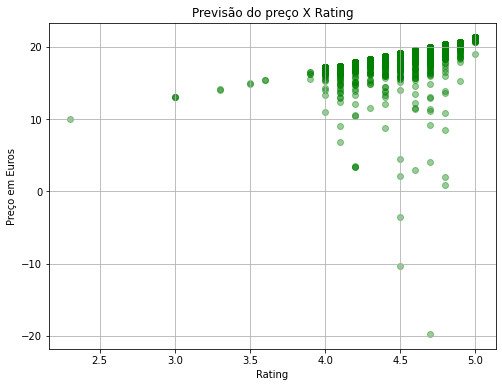

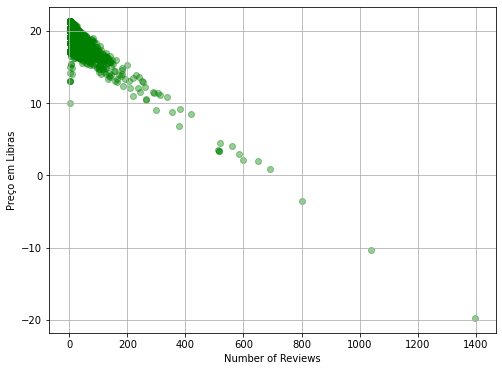

In [18]:
plt.figure(figsize = (8,6))
plt.scatter(dados.rating,resultados.predict(), c='green', alpha=0.4)
plt.title('Previsão do preço X Rating')
plt.grid(True)
plt.xlabel('Rating')
plt.ylabel('Preço em Euros')

plt.figure(figsize = (8,6))
plt.grid(True)
plt.scatter(dados.number_of_reviews,resultados.predict(), c='green', alpha=0.4)
plt.xlabel('Number of Reviews')
plt.ylabel('Preço em Libras')

plt.show()

# TODO: Achar precisão com sklearn.metrics

# Tentativa #2: Regressão Linear com 5 features usando DUMMIES
A fim de melhorar a exatidão do modelo criado na tentativa anterior, nós vamos adicionar mais 3 features: Categoria, Subcategoria e Subsubcategoria do produto. Antes de fazer isso, porém, é necessário transformar essas variáveis categóricas em dados quantitativos, o que será feito usando DUMMIES.

In [19]:
dummiesdados = pd.get_dummies(dados, columns=['parentcategory'])
dummiesdados

,price (£),number_of_reviews,rating,category,subcategory,subsubcategory,new_parentcategory,new_subcategory,new_subsubcategory,parentcategory_Arts & Crafts,...,"parentcategory_Pens, Pencils & Writing Supplies",parentcategory_Pretend Play,parentcategory_Puppets & Puppet Theatres,parentcategory_Sex & Sensuality,parentcategory_Sports Toys & Outdoor,"parentcategory_Storage, Cleaning & Ring Sizers",parentcategory_Supporters' Gear,"parentcategory_Sweets, Chocolate & Gum",parentcategory_Women,parentcategory_Worlds Apart
0,3.42,15,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Model Trains & Railway Sets,Rail Vehicles,Hobbies,Model Trains & Railway Sets,Outros,0,...,0,0,0,0,0,0,0,0,0,0
1,16.99,2,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Model Trains & Railway Sets,Rail Vehicles,Hobbies,Model Trains & Railway Sets,Outros,0,...,0,0,0,0,0,0,0,0,0,0
2,9.99,17,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,Model Trains & Railway Sets,Rail Vehicles,Hobbies,Model Trains & Railway Sets,Outros,0,...,0,0,0,0,0,0,0,0,0,0
3,39.99,1,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Model Trains & Railway Sets,Rail Vehicles,Hobbies,Model Trains & Railway Sets,Outros,0,...,0,0,0,0,0,0,0,0,0,0
4,32.19,3,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Model Trains & Railway Sets,Rail Vehicles,Hobbies,Model Trains & Railway Sets,Outros,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,22.95,3,5.0,Hobbies > Collectible Figures & Memorabilia > ...,Collectible Figures & Memorabilia,Collectible Props & Memorabilia,Hobbies,Outros,Outros,0,...,0,0,0,0,0,0,0,0,0,0
7982,39.99,1,4.0,Characters & Brands > Star Wars > Toys,Star Wars,Toys,Characters & Brands,Outros,Toys,0,...,0,0,0,0,0,0,0,0,0,0
7983,43.99,1,5.0,Novelty & Special Use > Novelty > Accessories ...,Novelty,Accessories,Outros,Outros,Outros,0,...,0,0,0,0,0,0,0,0,0,0
7984,49.81,1,5.0,Hobbies > Collectible Figures & Memorabilia > ...,Collectible Figures & Memorabilia,Collectible Props & Memorabilia,Hobbies,Outros,Outros,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:


# Target é o preço
y_d = dummiesdados[['price (£)']].values

# Vamos usar o preço, número de reviews e categorias como features
x_d = dummiesdados[['number_of_reviews', 'rating', 'parentcategory_Arts & Crafts',
       'parentcategory_Baby & Toddler Toys', 'parentcategory_Bags',
       'parentcategory_Bedding & Linens', 'parentcategory_Camping & Hiking',
       'parentcategory_Characters & Brands', 'parentcategory_Cooking & Dining',
       'parentcategory_Die-Cast & Toy Vehicles', 'parentcategory_Dogs',
       'parentcategory_Dolls & Accessories', 'parentcategory_Educational Toys',
       'parentcategory_Electronic Toys', 'parentcategory_Fancy Dress',
       'parentcategory_Figures & Playsets', 'parentcategory_Games',
       'parentcategory_Gardening', 'parentcategory_Handbags & Shoulder Bags',
       'parentcategory_Hobbies', 'parentcategory_Home Accessories',
       'parentcategory_Indoor Lighting',
       'parentcategory_Jams, Honey & Spreads',
       'parentcategory_Jigsaws & Puzzles',
       'parentcategory_Laundry, Storage & Organisation',
       'parentcategory_Medication & Remedies', 'parentcategory_Men',
       'parentcategory_Musical Toy Instruments',
       'parentcategory_Novelty & Special Use',
       'parentcategory_Novelty Jewellery', 'parentcategory_Office Supplies',
       'parentcategory_Party Supplies',
       'parentcategory_Pens, Pencils & Writing Supplies',
       'parentcategory_Pretend Play',
       'parentcategory_Puppets & Puppet Theatres',
       'parentcategory_Sex & Sensuality']].values

# Agora vamos fazer MMQ (OLS) com a função regress
resultados_d = regress(y_d, x_d)
resultados.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price (£)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.974
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           4.72e-05
Time:                        16:50:46   Log-Likelihood:                -40588.
No. Observations:                7986   AIC:                         8.118e+04
Df Residuals:                    7983   BIC:                         8.120e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6675      5.583      0.120      0.905     -10.277      11.612
number_of_reviews    -0.0285      0.012     -2.365      0.018      -0.052      -0.005
rating                4.1297      1.179      3.503      0.000       1.819       6.441
==============================================================================
Omnibus:                    11485.500   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4758387.250
Skew:                           8.533   Prob(JB):                         0.00
Kurtosis:                     121.359   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

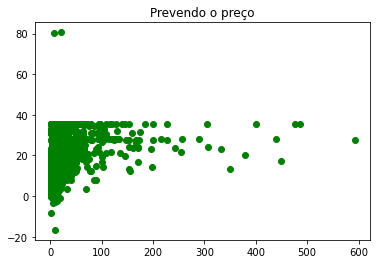

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_d, y_d, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
plt.scatter(y_test, predictions, color = 'green')
plt.title('Prevendo o preço')
plt.show()



In [22]:
a = predictions.tolist()
lista = []
i = 0
while i < len(a):
    lista.append(a[i][0])
    i+=1

b = y_test.tolist()
lista2 = []
k = 0
while k < len(b):
    lista2.append(b[k][0])
    k+=1

index = range(0,len(y_test))
df = pd.DataFrame({'Real Values':lista2,'Predicted Values':lista})
df

,Real Values,Predicted Values
0,5.86,7.719685
1,10.75,14.031650
2,8.81,27.744124
3,7.71,0.028477
4,49.99,16.784657
...,...,...
2391,8.45,16.784657
2392,11.99,35.368322
2393,20.00,16.669598
2394,129.95,31.814431


# Tentativa #3: Decision Tree

In [23]:
# Fitting Decision Tree Regression to the dataset
regressor2 = DecisionTreeRegressor(random_state=0)
regressor2.fit(x_d,y_d)
y_predT = regressor2.predict(x_test)


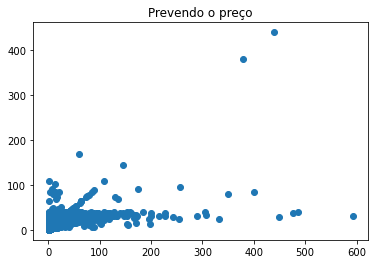

In [24]:
plt.scatter(y_test, y_predT)
plt.title('Prevendo o preço')
plt.show()

In [25]:
df = pd.DataFrame({'Real Values(£)':y_test.reshape(-1), 'Predicted Values(£)':y_predT.reshape(-1)})
df

,Real Values(£),Predicted Values(£)
0,5.86,6.482424
1,10.75,13.338000
2,8.81,32.503986
3,7.71,7.710000
4,49.99,16.599075
...,...,...
2391,8.45,16.599075
2392,11.99,37.213776
2393,20.00,19.015000
2394,129.95,73.470000


In [26]:
df = pd.DataFrame({'Real Values (£)':y_test.reshape(-1), 'Predicted values (£) (linear regression)': lista, 'Predicted Values (£)(Decision Tree)':y_predT.reshape(-1)})
df


,Real Values (£),Predicted values (£) (linear regression),Predicted Values (£)(Decision Tree)
0,5.86,7.719685,6.482424
1,10.75,14.031650,13.338000
2,8.81,27.744124,32.503986
3,7.71,0.028477,7.710000
4,49.99,16.784657,16.599075
...,...,...,...
2391,8.45,16.784657,16.599075
2392,11.99,35.368322,37.213776
2393,20.00,16.669598,19.015000
2394,129.95,31.814431,73.470000


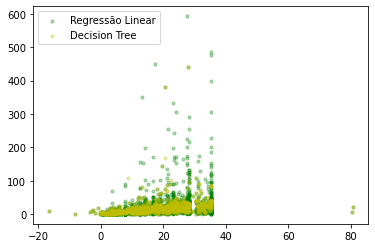

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(lista, y_test, s=10, c='g', alpha = 0.3, label='Regressão Linear')
ax1.scatter(lista,y_predT, s=10, c='y',alpha = 0.3, label='Decision Tree')
plt.legend(loc='upper left');
plt.show()

In [28]:
print('Erros da regressão Linear')
print('MAE: {} '.format(metrics.mean_absolute_error(y_test, predictions)))
metrics.mean_squared_error(y_test, predictions)
print('MSE: {} '.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

print('')
print('Erros da decision Tree')

print('MAE: {} '.format(metrics.mean_absolute_error(y_test,y_predT)))
metrics.mean_squared_error(y_test, predictions)
print('MSE: {} '.format(metrics.mean_squared_error(y_test,y_predT)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predT))))


Erros da regressão Linear
MAE: 16.016865667169167 
MSE: 1369.5797053866484 
RMSE: 37.00783302743689

Erros da decision Tree
MAE: 13.862525615903795 
MSE: 1149.9113912891416 
RMSE: 33.91034342629313


# Conclusão:

Em relação à hipótese proposta na Análise Exploratória, é possível concluir que essa afirmação é verdadeira, pois nos gráficos de dispersão gerados durante nossa análise, a quantidade de reviews sempre foi maior na região do gráfico na qual se localizam os menores preços. Porém, não é possível ter certeza se isso ocorre por conta da maior procura por produtos mais baratos, ou por conta da qualidade do produto. 

Além disso, foi possível concluir que todos os fatores e features incluídos na regressão linear impactam no preço pois: a média de erro absoluta entre os valores do DataSet e os valores obtidos por meio das regressões lineares foram relativamente baixas; sendo o erro médio absoluto da regressão linear de 16.02% e da Linear Regression Tree igual a 13.86%.

Desta maneira, também é possível concluir que no nosso caso, o Linear Regression Tree foi mais eficaz pois teve uma porcentagem menor de erro.
